In [658]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [659]:
#Reading the data file and storing it
concrete=pd.read_csv('concrete.csv')

In [660]:
concrete.head(10)
#From below data, we can see that all the values are numeric and continuous. 
#Let's analyze it further

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,1.4e+02,2.1e+02,0,2e+02,0,9.7e+02,7.5e+02,28,30
1,1.7e+02,42,1.2e+02,1.6e+02,11,1.1e+03,8e+02,14,24
2,2.5e+02,0,96,1.9e+02,5.5,9.6e+02,8.6e+02,28,29
3,2.7e+02,1.1e+02,0,2.3e+02,0,9.3e+02,6.7e+02,28,46
4,1.5e+02,1.8e+02,0,1.9e+02,9.1,1e+03,7e+02,28,18
5,2.6e+02,0,0,1.9e+02,0,8.9e+02,9.4e+02,90,22
6,1.7e+02,2.5e+02,0,2e+02,0,9.8e+02,6.9e+02,7,16
7,2.5e+02,0,1.2e+02,1.9e+02,6.4,1e+03,7.6e+02,56,37
8,3e+02,0,0,1.9e+02,0,1.1e+03,7.6e+02,28,22
9,1.6e+02,1.8e+02,1.4e+02,1.9e+02,9,8.8e+02,7e+02,28,29


In [661]:
concrete.info()
#The data set has 1030 rows and 9 columns, all are numeric. 
#All these numeric columns hold float values except age which is of int type 
#From below data, we could sense that there are no missing values as 1030 data entries are present for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [662]:
#Data analysis

In [663]:
concrete.describe().transpose()
#Inference: From below data we can conclude that no negetive values are present.
#Outliers can be expected for columns-slag, ash,superplastic, age and strength as 
#there is huge difference between 50% and max values (i.e., values are out of mean+-2d range)

,count,mean,std,min,25%,50%,75%,max
cement,1e+03,2.8e+02,1e+02,1e+02,1.9e+02,2.7e+02,3.5e+02,5.4e+02
slag,1e+03,74,86,0,0,22,1.4e+02,3.6e+02
ash,1e+03,54,64,0,0,0,1.2e+02,2e+02
water,1e+03,1.8e+02,21,1.2e+02,1.6e+02,1.8e+02,1.9e+02,2.5e+02
superplastic,1e+03,6.2,6,0,0,6.4,10,32
coarseagg,1e+03,9.7e+02,78,8e+02,9.3e+02,9.7e+02,1e+03,1.1e+03
fineagg,1e+03,7.7e+02,80,5.9e+02,7.3e+02,7.8e+02,8.2e+02,9.9e+02
age,1e+03,46,63,1,7,28,56,3.6e+02
strength,1e+03,36,17,2.3,24,34,46,83


In [664]:
# Checking the presence of missing values.
concrete.isnull().values.any(),concrete.isna().values.any(),concrete.isna().sum()
# Below data indicates that there are no null and NAN values. 

(False, False, cement          0
 slag            0
 ash             0
 water           0
 superplastic    0
 coarseagg       0
 fineagg         0
 age             0
 strength        0
 dtype: int64)

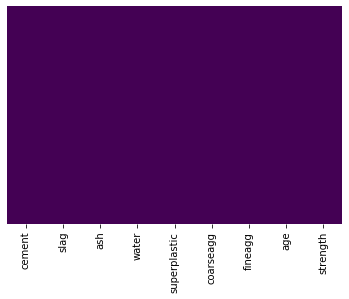

In [665]:
#Let's reconfirm the understanding with heatmap
sns.heatmap(concrete.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#From below graph, it is evident that none of the values are missing in the given data set

In [666]:
#Taking variables one by one and proceeding with required data treatments in below steps.
# We will perform univariate/bivariate (independent variable/dependent variable) analysis to understand  
#each attributes and choose carefully which all attributes have to be a part of the analysis and why
#Also required outlier treament will be performed for each variable in below steps

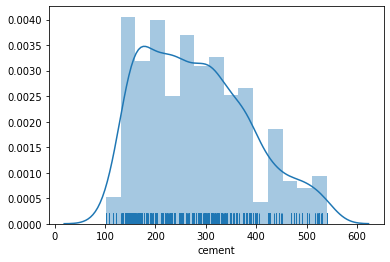

In [667]:
#Analyzing the variable-cement
sns.distplot(concrete['cement'], rug=True)
#Inference: Variable 'cement' has slight right skewed distribution in the given data set. 
#Shows presence of multiple modes
#No outliers are found and data is concentrated between ~100-550

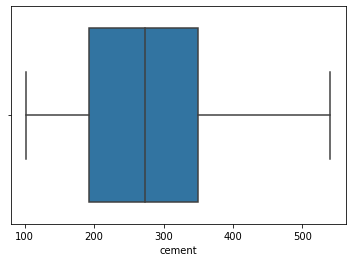

In [668]:
sns.boxplot(concrete['cement'])
#No outliers present w.r.t cement and it looks clean

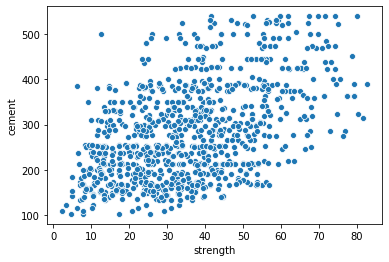

In [669]:
#Bivariate Analysis-cement vs strength
#We will use scatterplot as both are continuous variables
sns.scatterplot(concrete['strength'],concrete['cement'])
#Inference: Data is scattered and there is slight +ve co-relation between cement and strength.
#In other words if the cement in the mixture increases, then there is slight possibility that stregnth may also increase


In [670]:
#Analyzing the variable-slag

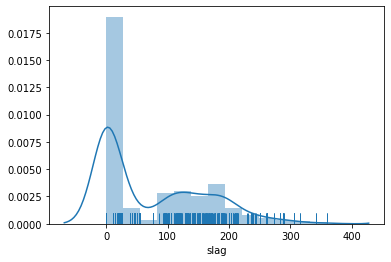

In [671]:
sns.distplot(concrete['slag'], rug=True)
#Inference: Variable slag has right tailed distribution. Data is spread unevenly
#Shows the possibility of having more than one gaussians

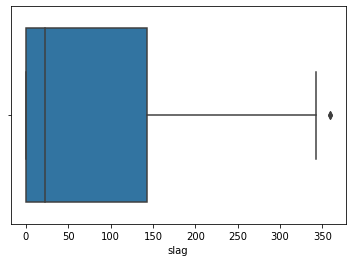

In [672]:
sns.boxplot(concrete['slag'])
#Boxplot shows the presence of outliers for slag
#So we can replace outliers (>350) with median.

In [673]:
concrete.slag.median()

22.0

In [674]:
#Replacing outliers with median value
concrete["slag"]=np.where(concrete["slag"]>350, 22.0,concrete["slag"])

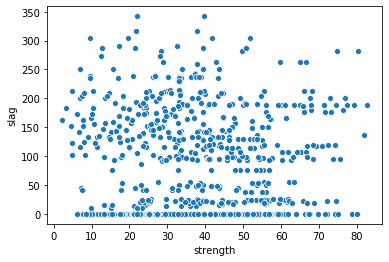

In [675]:
#Bivariate Analysis-slag vs strength
sns.scatterplot(concrete['strength'],concrete['slag'])
#Inference: Two observations as mentioned below:
#1. We could see that strength varies between range 5-80 when the corresponding value of slag is 0. 
#2. Also also when the slag increases, there is no linear relationship between slag and strength observed

In [676]:
#Analyzing the variable-ash

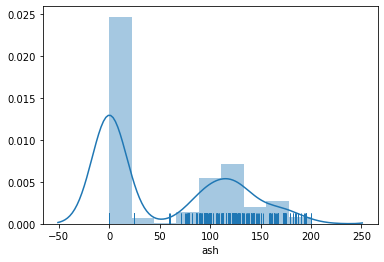

In [677]:
sns.distplot(concrete['ash'],rug=True)
#Inference: ash has multiple modes, right tailed. Value ranges between 0-200 
#Shows the possibility of presence of 2 gaussians
#Values are discontinued between 48-55

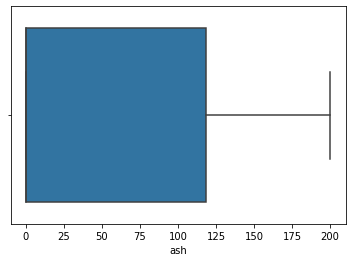

In [678]:
sns.boxplot(concrete['ash'])
#Inference: No outliers present

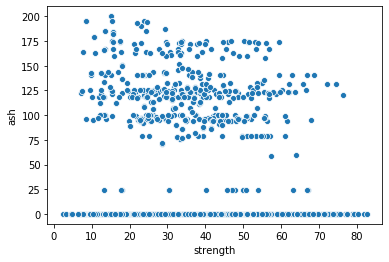

In [679]:
#Bivariate Analysis-ash vs strength
sns.scatterplot(concrete['strength'],concrete['ash'])
#Inference: 3 observations:
#1. For ash=0, stregnth varies between 0-80. 
#2. For ash>75, strength is scattered. 
#3. Nonlinear distribution

In [680]:
#Analyzing variable-'water'

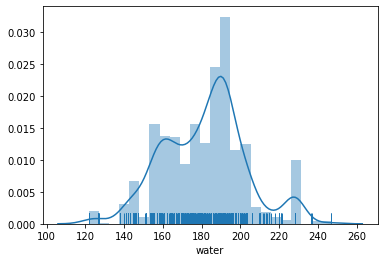

In [681]:
sns.distplot(concrete['water'],rug=True)
#Inference: Data is slightly left tailed, shows the multiple modes

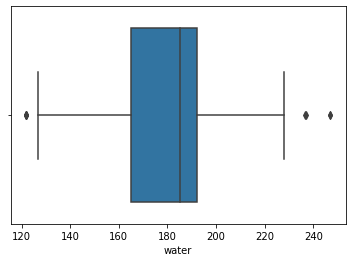

In [682]:
sns.boxplot(concrete['water'])
#Boxplot shows the presence of outliers for water (values>230 and values<130 can be considered as outliers in below graph)
#So we should replace outlier values with median 

In [683]:
concrete.water.median()

185.0

In [684]:
#Replacing outliers (values >230) with median value
concrete["water"]=np.where(concrete["water"]>230, 185.0,concrete["water"])

In [685]:
#Replacing outliers (values <130) with median value
concrete["water"]=np.where(concrete["water"]<130, 185.0,concrete["water"])

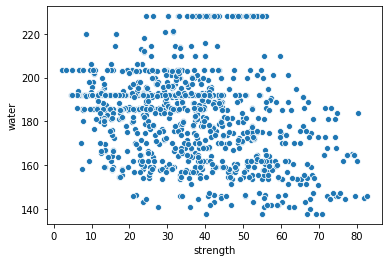

In [686]:
#Bivariate Analysis-water vs strength
sns.scatterplot(concrete['strength'],concrete['water'])
#Inference: There is no strong co-relation between water and strength.
#For water range between 165-195, strength is scattered, also slightly -ve co-efficents can be found below
#i.e, slightly -ve non linear distribution between water and strength

In [687]:
#Moving forward with variable-'superplastic'

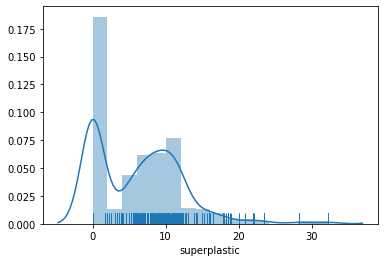

In [688]:
sns.distplot(concrete['superplastic'],rug=True)
#Variable superplastic' has multiple modes, possibilty of 2 gaussians.
#concentration can be seen between range of 0-24 and 0 being the mode

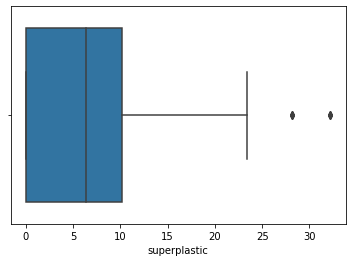

In [689]:
#Let's check if 'superplastic' variable has any outliers 
sns.boxplot(concrete['superplastic'])
#Boxplot shows the presence of outliers for superplastic (values>24 can be considered as outliers in below graph)
#So we should replace outlier values with median value

In [690]:
concrete['superplastic'].median()

6.4

In [691]:
#Replacing outliers with median value
concrete['superplastic']=np.where(concrete["superplastic"]>24, 6.4,concrete["superplastic"])

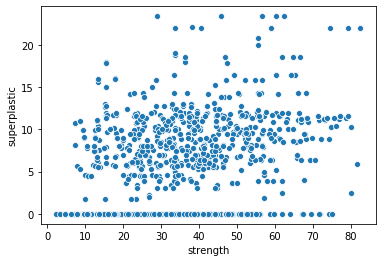

In [692]:
#Bivariate Analysis-superplastic vs strength
sns.scatterplot(concrete['strength'],concrete['superplastic'])
#Inference: 2 observations:
#1. For superplastic=0, strength varies between range 1-78
#2. For superplastic>0, strenth is scattered 
#3. Nonlinear distribution

In [693]:
#Analyzing variable-'coarseagg' in below steps.

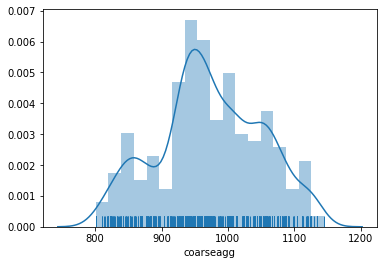

In [694]:
sns.distplot(concrete['coarseagg'],rug=True)
#Inference: coarseagg does not have normal distribution. Shows the presence of multiple modes
#Concentration can be found between range 800-1150. Slightly right skewed

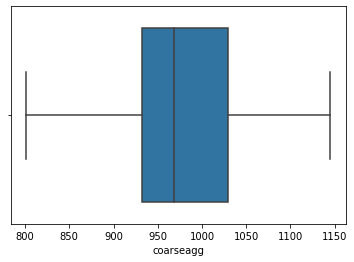

In [695]:
#Checking for outliers
sns.boxplot(concrete['coarseagg'])
# Outliers are not found

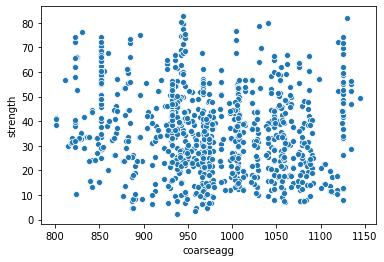

In [696]:
#Bivariate Analysis-coarseagg vs strength
sns.scatterplot(concrete['coarseagg'],concrete['strength'])
#Inference: There is no linear relationship between variable-'coarseagg' and 'strength'
#For coarseagg=850 and 1150, multiple values of strength is present 

In [697]:
#Analysis of variable-fineagg

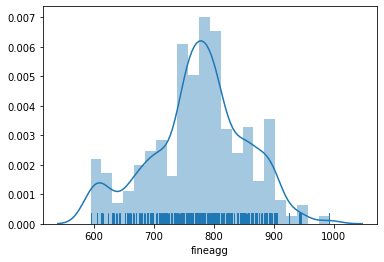

In [698]:
sns.distplot(concrete['fineagg'],rug=True)
#Inference: fineagg shows somwhat symmerical distribution, and shows presence of left tail and multiple modes
#data is concentrated between value range of 600-950

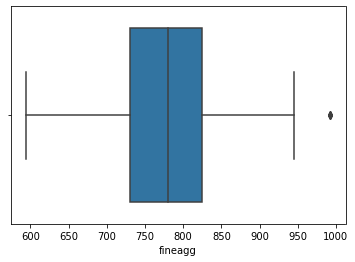

In [699]:
sns.boxplot(concrete['fineagg'])
#Outliers are present. Let's replace outliers with median value

In [700]:
concrete.fineagg.median()

779.5

In [701]:
concrete["fineagg"]=np.where(concrete["fineagg"]>950,779.5,concrete["fineagg"])

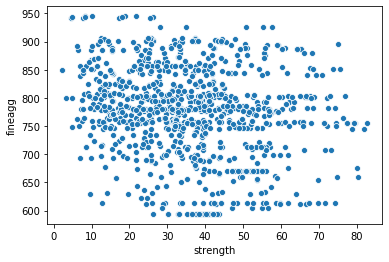

In [702]:
#Bivariate Analysis-fineagg vs stregnth
sns.scatterplot(concrete['strength'],concrete['fineagg'])
#Inference: No leaner relationship between fineagg and strength

In [703]:
#Analysing the variable:age

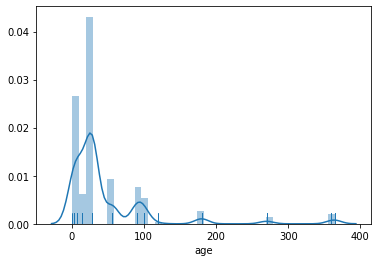

In [704]:
sns.distplot(concrete['age'],rug=True)
#Data is not symmerically distributed and has multiple modes, right tailed
#Shows the presence of multiple gaussians. age has descrete values

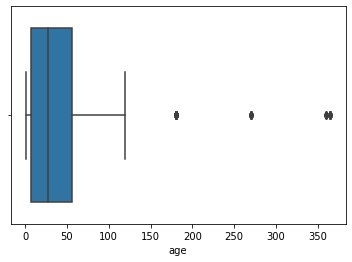

In [705]:
#Checking if outliers are present
sns.boxplot(concrete['age'])
#Outliers are present and we can consider values>85 as outliers. Let's replace outliers with median

In [706]:
concrete.age.median()

28.0

In [707]:
concrete["age"]=np.where(concrete["age"]>85,28,concrete["age"])

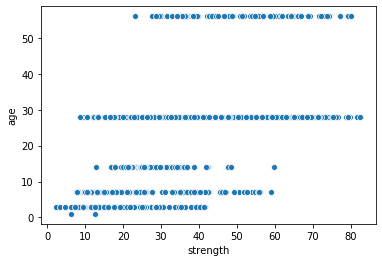

In [708]:
#Bivariate Analysis-age vs strength
sns.scatterplot(concrete['strength'],concrete['age'])
#Inference: Shows that age has descrete value and for given value of age the range of strength varies.
# age~=28, concentration of target data is more.

In [709]:
#Analyzing the target variable "strength"

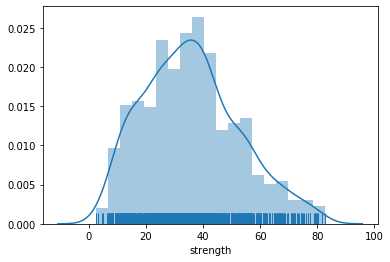

In [710]:
sns.distplot(concrete["strength"], rug=True)
#Inference: strength is almost symmetrically distributed, value ranges between ~3-82

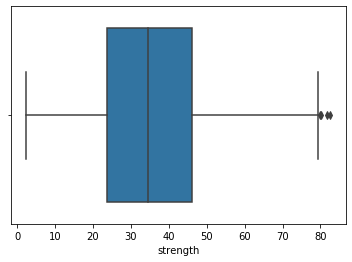

In [711]:
sns.boxplot(concrete["strength"])
#Shows the presence of outliers, values>78 can be considered as outliers

In [712]:
concrete.strength.median()

34.445

In [713]:
concrete["strength"]=np.where(concrete["strength"]>78,34.445,concrete["strength"])

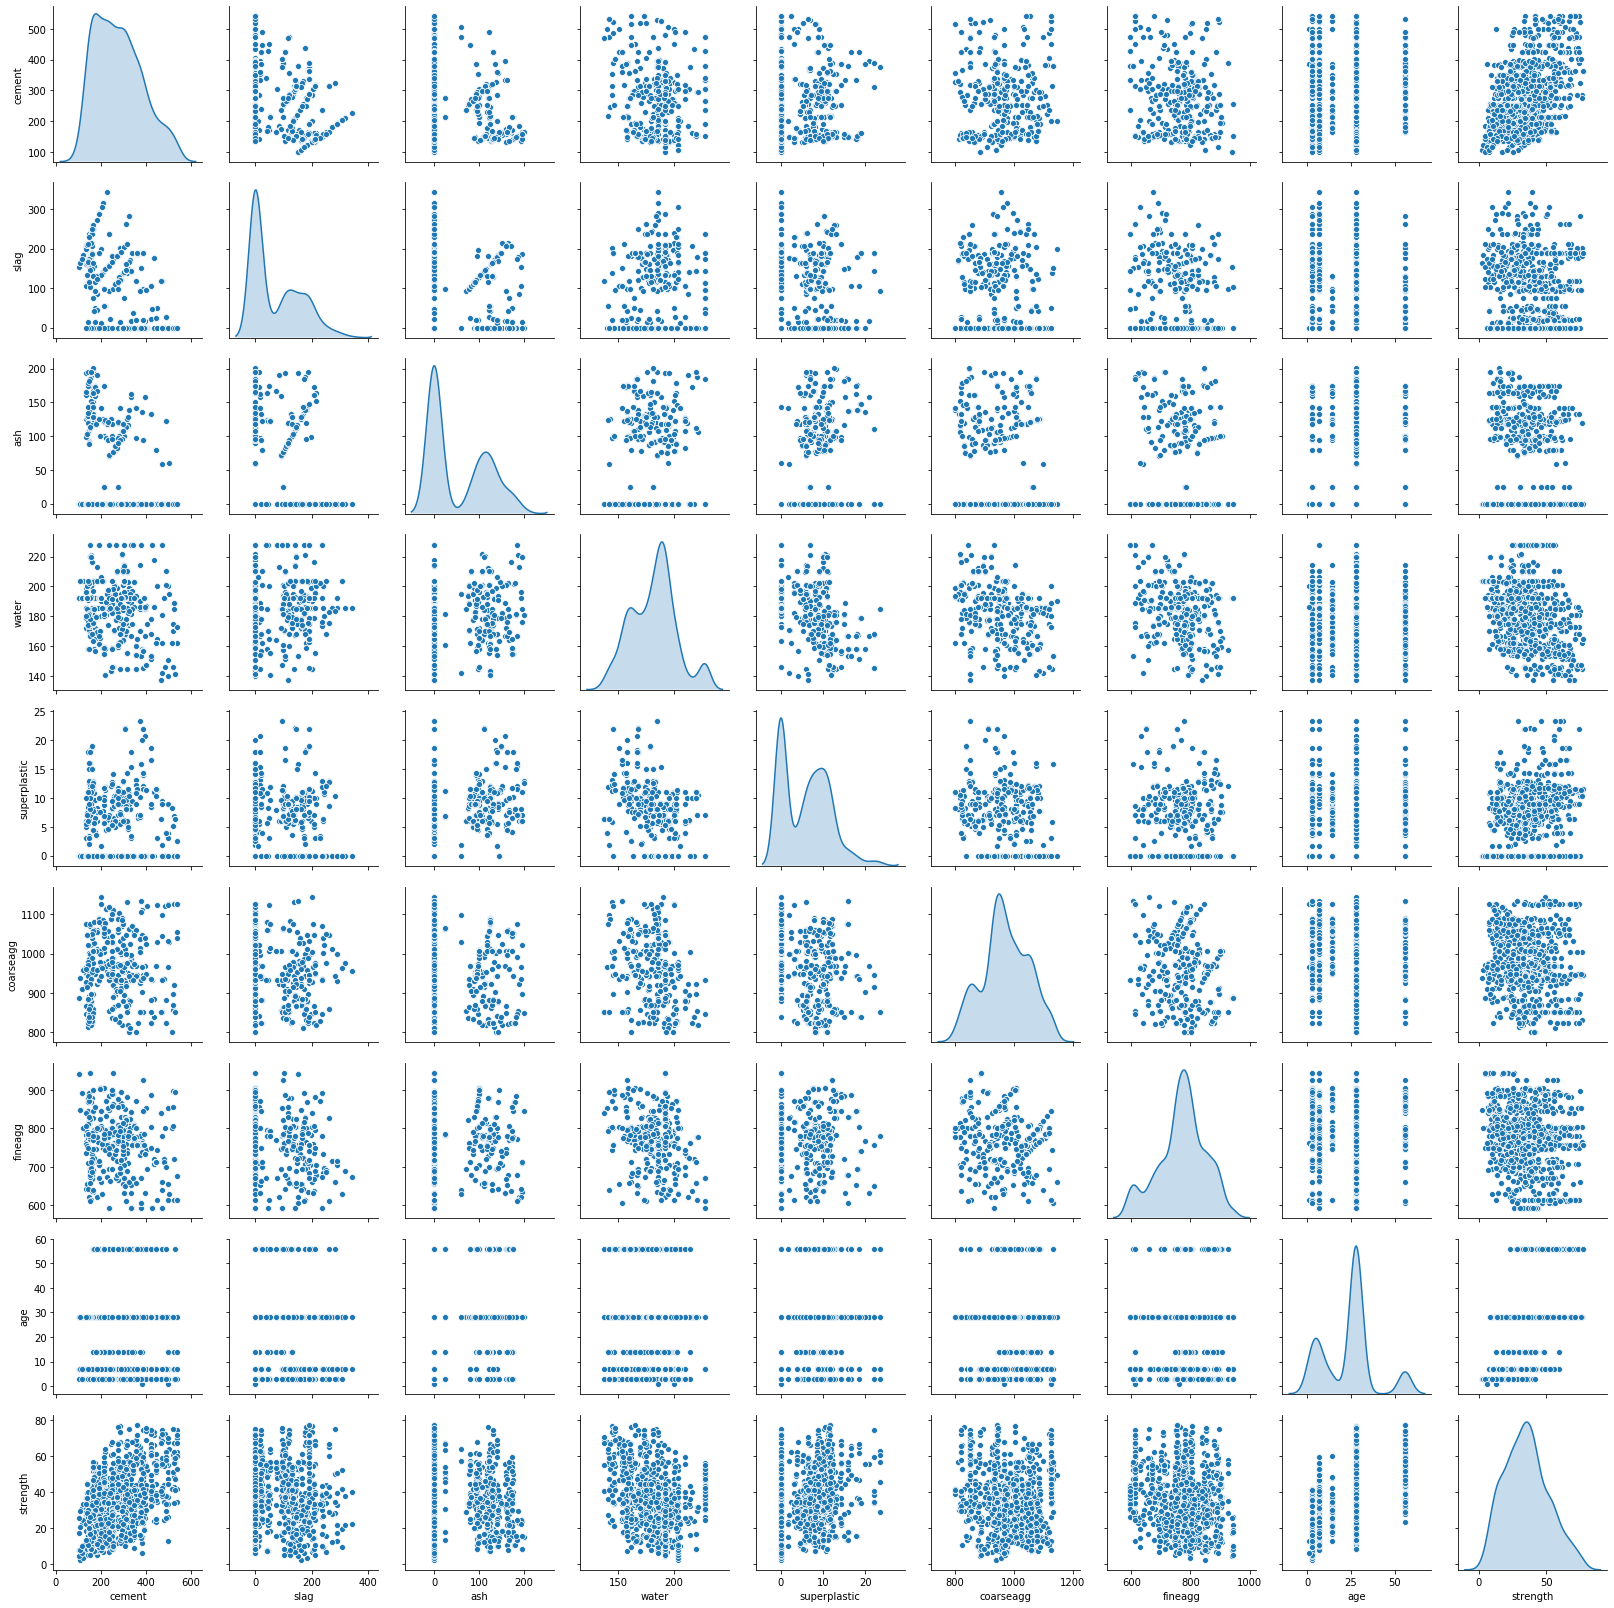

In [714]:
sns.pairplot(concrete, diag_kind = 'kde')
#Inference from pairplot:
#1. Only 'strength' and 'cement' has almost normal distribution and they show +ve linear relationship
#2. Variable age is influencing the strenth in 3 intervals: >20 days, ~30 days and <50 days

In [715]:
#Data clean up and analysis is completed. We are good to proceed further.
#Overall inference from the EDA is summarized below:
#Values are not missing in the data set. null/NAN values are not present.
#Outliers are replaced with medians.
#Some of the variables-slag,ash,superplastic,age shows the presence of multiple gaussians.
#Variable age is influencing the strenth in 3 intervals: >20 days, ~30 days and <50 days
#Variable cement has +ve linear relationship w.r.t strength
# So overall variables-cement and age are two main factors influencing the strength of concrete 
#From bivariate/pairplot analysis, it is evident that many variables has non linear distribution in the given data set

In [716]:
#Separating independent and target variables in the below step

In [717]:
import numpy as np  
import os
#Drop the target 'strength' from data
x=concrete.drop('strength',axis=1)
y=concrete['strength']

In [718]:
#Data Scaling/Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn import preprocessing
# scale all the columns of the concrete. 
x_scaled = preprocessing.scale(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)  

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled)  

In [719]:
#Splitting train and test data
from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,train_size=0.70,test_size=0.30,random_state=0)
x_train,x_test,y_train,y_test

(     cement  slag   ash  water  superplastic  coarseagg  fineagg   age
 772   -0.66 -0.86   1.1 -0.087         -0.05        1.1    0.086 -0.69
 997    -1.1   1.1   1.2   0.74          0.37      -0.15     -1.7   0.3
 724    0.96 -0.86 -0.85   0.18          -1.1        1.7     0.15   0.3
 167      -1  -0.7   1.8   -1.3         -0.34       0.43      1.1   0.3
 764    -1.2 -0.86     2  -0.75           1.8        1.3     -1.2   0.3
 ..      ...   ...   ...    ...           ...        ...      ...   ...
 277   -0.04  0.51  0.58   0.43          0.19      -0.34     -1.4   0.3
 763     2.3 -0.86 -0.85   0.35          -1.1          2       -2  -1.5
 835   -0.56 -0.86  0.66   0.36         -0.27     -0.075      1.2   0.3
 559    0.15 -0.86  0.99  -0.36          0.64       0.64    -0.24   0.3
 684    -1.2   1.2   2.1    1.9          0.19       -1.5       -2   0.3
 
 [721 rows x 8 columns],
      cement  slag   ash  water  superplastic  coarseagg  fineagg  age
 747    -0.3   1.1 -0.85    1.1       

In [720]:
#Fitting simple linear regression model and printing the co-efficients
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

#Inference:
#From the below data, it is evident that cement and age has higher co-efficients in the given data set 
#slag, ash, superlastic has second highest co-efficients, where as water, coarseagg and fineagg has -ve co-efficients

The coefficient for cement is 0.5904533818997354
The coefficient for slag is 0.3068968837682788
The coefficient for ash is 0.11684621718940452
The coefficient for water is -0.21970605742613544
The coefficient for superplastic is 0.03188958089302812
The coefficient for coarseagg is -0.02266537033661881
The coefficient for fineagg is -0.04380909230906556
The coefficient for age is 0.5193569582328303


In [721]:
#Generating intercept of the linear regression
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.0014339146619221175


In [722]:
#As co-efficients are very high, we need to regularize the model with RIDGE/LASSO

In [723]:
#Let us apply RIDGE regression on the above data and obtaining co-efficients
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(x_train,y_train)
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, ridge.coef_[0][idx]))
    
 #Inference: When RIDGE is applied, co-efficients did not reduce much   

The coefficient for cement is 0.5885721849015186
The coefficient for slag is 0.3051349627980268
The coefficient for ash is 0.11528985943689832
The coefficient for water is -0.2206528601163327
The coefficient for superplastic is 0.03214000858991589
The coefficient for coarseagg is -0.02370948608501752
The coefficient for fineagg is -0.04520705356972281
The coefficient for age is 0.5191133544666416


In [724]:
#Creating a LASSO model and obtaining the co-efficients
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))
#Inference: With LASSO model many of the dimensions reduced to 0 
#which means that those features (ash,coarseagg,fineagg) can be dropped from the data set as they are of least importance.

Lasso model: [ 0.41256154  0.12013778  0.         -0.09141146  0.09926917 -0.
 -0.          0.42709633]


In [725]:
#Comparing the scores from each of the above model
print(regression_model.score(x_train, y_train))
print(regression_model.score(x_test, y_test))


0.678924418038309
0.7142384556934744


In [726]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.6789237361608988
0.7141051361192416


In [727]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.6222691019529827
0.6301191647803394


In [728]:
#Inference: When dimension is reduced by 3 features(columns), model is giving the reasonably better score
#Also score is almost same across both train and test data set in LASSO model.

In [729]:
#From the bivariate and pairplot analysis, we found that there are many vaiables which 
#are non-linear in the given data set. Hence it makes sense to apply polynomial regression for this data set

In [780]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)
#poly = PolynomialFeatures(2)

In [781]:
x_poly = poly.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.30, random_state=1)
x_train.shape

(721, 37)

In [782]:
# Fitting a simple non regularized linear model on poly features
regression_model.fit(x_train, y_train)
print ("regression model:",(regression_model.coef_))

regression model: [ 8.71248681e-17  1.22407278e+01  8.37854682e+00  3.62706770e+00
 -2.01075728e+00  3.63629152e-01  1.01037949e+00  1.85942464e+00
  8.43641268e+00  1.64907781e+00  1.82534712e+00 -2.43601128e+00
 -2.24435968e+00  1.43973746e+00  1.07107348e+00  2.37797244e-03
  1.94257567e+00 -1.10518777e+00 -1.22422409e+00  1.20466201e+00
  1.85378149e+00  7.73675106e-01 -4.06010563e+00 -3.24751026e+00
  1.15793108e+00  7.68569791e-01 -2.21844827e-01  6.29414160e-01
 -2.23366956e+00 -1.26200698e+00 -1.18887479e+00 -7.12876610e-01
 -5.32503394e-01 -2.25337457e+00  5.27485316e-01 -1.68627729e-02
 -4.36083880e-01]


In [783]:
## Fitting RIDGE model on poly features
ridge = Ridge(alpha=0.06)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.00000000e+00  1.22236263e+01  8.35974317e+00  3.61282732e+00
 -2.02096691e+00  3.64355376e-01  1.00031130e+00  1.84576378e+00
  8.43598908e+00  1.64464392e+00  1.82221264e+00 -2.43092674e+00
 -2.23468238e+00  1.43827456e+00  1.06929623e+00  2.25817916e-03
  1.93743674e+00 -1.10244335e+00 -1.21646287e+00  1.20206635e+00
  1.85091390e+00  7.73560901e-01 -4.05433066e+00 -3.24102746e+00
  1.15636704e+00  7.67250235e-01 -2.22194927e-01  6.32847965e-01
 -2.23079657e+00 -1.26065440e+00 -1.18833874e+00 -7.07986780e-01
 -5.26025881e-01 -2.25324749e+00  5.27026516e-01 -1.69093578e-02
 -4.35846931e-01]


In [784]:
# Fitting LASSO model on poly features
lasso = Lasso(alpha=0.01)
#lasso = Lasso(alpha=3)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 0.         11.92228415  7.96733901  3.31244861 -2.16638378  0.40990811
  0.82826773  1.61154121  8.44914636  1.46213956  1.6054613  -2.21932543
 -1.67174284  1.33941486  0.98449625  0.          1.67558042 -0.912751
 -0.68655756  1.10385004  1.75213708  0.76326123 -3.88878852 -2.79797461
  0.99899494  0.63016982 -0.23830424  0.87088449 -2.10576426 -1.14732034
 -1.10125024 -0.31295247 -0.07858043 -2.19226379  0.50227001 -0.
 -0.40342011]


In [785]:
#Printing score of each model
print(regression_model.score(x_train, y_train))
print(regression_model.score(x_test, y_test))

0.754020957866455
0.7452522088771778


In [786]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.7540207665963938
0.7452675954942463


In [787]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.753790933418297
0.7465268636355645


In [788]:
#Inference:
#LASSO-Polynomial seams to be better model as it is giving same results as Linear and Ridge regression
#with reduced dimension

In [789]:
#Applying hyper parameter tuning to check if we can get extra performance.
#Ex: Lets get the score for alpha=0.06,0.5,1 and check if we can further improve the performance

In [790]:
lasso = Lasso(alpha=0.06)
#lasso = Lasso(alpha=3)
lasso.fit(x_train,y_train)
#print ("Lasso model:", (lasso.coef_))
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.7498645558093605
0.744961750858948


In [795]:
lasso = Lasso(alpha=0.5)
#lasso = Lasso(alpha=3)
lasso.fit(x_train,y_train)
#print ("Lasso model:", (lasso.coef_))
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.7148641506145686
0.692133919115574


In [796]:
lasso = Lasso(alpha=1)
#lasso = Lasso(alpha=3)
lasso.fit(x_train,y_train)
#print ("Lasso model:", (lasso.coef_))
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))


0.6787536413456754
0.6432779588453603


In [797]:
#from sklearn.metrics import confusion_matrix
#y_pred = lasso.predict(x_test)
#cm_lasso=lasso.accuracy(y_test, y_pred)
#cm_lasso = confusion_matrix(y_test, y_pred)
#cm_lasso
#Since it is linear regression cannot print confusion matrix and accuracy scores.
#Error is received as values are continuous

In [798]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model=lasso
results = cross_val_score(model, x, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.65238582 0.72289321 0.65874477 0.64678882 0.71965107 0.75912921
 0.68866568 0.630852   0.71430805 0.55833546]
Accuracy: 67.518% (5.498%)


In [799]:
#At 95% confidence, accuracy will be +-1.9 SD
# From the above analysis, we obtained Accuracy=67.5% and SD=5.4%
# 1.9*SD=10.26
#So at 95% confidence level, LASSO-Polynomial model can perform at accuracy ranging 57.24% to 77.77%

In [800]:
#Conclusion:
#After applying multiple models-Linear, RIDGE, LASSO (simple and polynomial), 
#we can conclude that LASSO-Polynomial is performing better compared to remaining models
#Further when we tune this LASSO model with hyper parameter alpha, we get best model when alpha=0.06. 
#At this point when alpha=0.06, we could see 74% score w.r.t both train and test data (i.e., model is not underfitting/overfitting).
# At 95% confidence interval, LASSO model can perform at accuracy ranging 57.24% to 77.77%
#I feel this model is generalized model.
